
# Census Income Project

### Submitted by : Prashant Shekhar

Problem Statement:

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

## Importing dataset:

In [3]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [4]:
#To print all columns and all rows
pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

In [5]:
#importing data
df=pd.read_csv("D:/Cens.csv") #Reading csv file
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


Above is my dataset and i have some numerical columns and some categorical columns.But i have to predict wheather a person has income of $50k per year.So from this respective statement i can say that my target is Income and this is a Classification Poblem.

## Preprocessing and EDA:

In [6]:
#Checking shape of dataset
df.shape

(32560, 15)

In this particular data set i have 32560 rows and 15 columns.

In [7]:
#Checking all column names
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

Above are the list of column names in the dataset.

In [8]:
#Checking the data types of all columns
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In this particular dataset i have two types of columns int type and object type.

In [9]:
#Checking the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


It looks very clear that i don't have any empty observations in my dataset.And also i can have a look into data types of each column.

In [12]:
#Checking unique values of each column
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

Above are the unique value count of each column in the dataset.

In [13]:
#Checking null values in the dataset
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

I don't find any null values in my dataset.

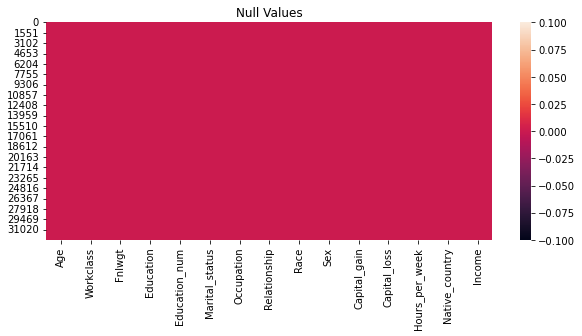

In [14]:
#Visualizeing null values
plt.figure(figsize=[10,4])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

By Visualization it looks there is no null values in the data set.

In [15]:
#Checking unique values of target column
df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

There are only two unique counts in the target column so it's a binary classification problem.

In [16]:
#Checking for empty observations
df.loc[df['Income'] == " "]

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


There is no empty observations in my dataset.

In [17]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column.
for i in df.columns:
        print(df[i].value_counts())
        print('****************************************')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
****************************************
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
****************************************
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64
****************************************
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              4

So i can notice that there are some '?' entries in Workclass, Occupation and Native_country column.

### So i have replace this '?' with the mode of the above columns.Since they are categorical columns.

In [18]:
# let's check the mode of Workclass column 
df["Workclass"].mode()  # we will fill the '?' values with this mode value

0     Private
dtype: object

Mode for Workclass column is 'Private'.

In [19]:
#Replacing '?' with mode value
df['Workclass'] = df.Workclass.str.replace('?', 'Private')

In [20]:
# let's check the mode of Occupation column 
df["Occupation"].mode()  # we will fill the '?' values with this mode value

0     Prof-specialty
dtype: object

Mode of Occupation column is 'Prof-specialty'.

In [21]:

#Replacing '?' with mode value
df['Occupation'] = df.Occupation.str.replace('?', 'Prof-specialty')

In [22]:
# let's check the mode of Native_country column 
df["Native_country"].mode()  # we will fill the '?' values with this mode value

0     United-States
dtype: object

Mode of Native_country column is 'United-States'.

In [23]:
#Replacing '?' with mode value
df['Native_country'] = df.Native_country.str.replace('?', 'United-States')

I have replaced all '?' with there respective mode values.

In [24]:
#Checking the value count of Capital_gain column
df["Capital_gain"].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64

In this perticular Capital_gain column there are 92% zero values so let me drop this column.

In [25]:
#Droping Capital_gain column
df = df.drop(["Capital_gain"],axis=1)

In [26]:
#Checking the value count of Capital_loss column
df["Capital_loss"].value_counts()

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64

In this perticular Capital_loss column there are 95% zero values so let me drop this column.

In [27]:
#Droping Capital_loss column
df = df.drop(["Capital_loss"],axis=1)

In [28]:
#Checking description of data set
df.describe()

,Age,Fnlwgt,Education_num,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,40.437469
std,13.640642,1.055498e+05,2.572709,12.347618
min,17.000000,1.228500e+04,1.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99.000000


Describe method will be summary only for numerical columns by default.This will help us to do analysis on outliers/skewness and checking whether null values present in dataset or not by looking into count.

## Visualization:

In [29]:
# Separating categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


Above are the list of categorical columns.

In [30]:
# Separating numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['Age', 'Fnlwgt', 'Education_num', 'Hours_per_week']


Above are the list of numerical columns.

## Univariate Analysis:

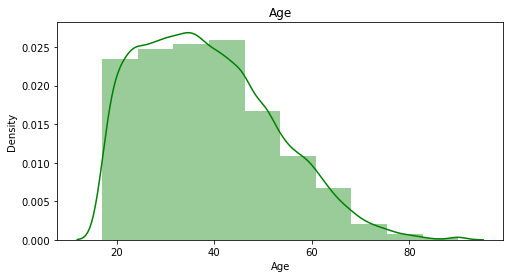

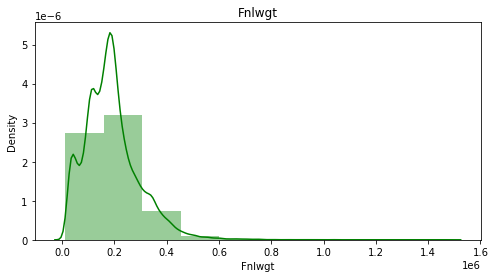

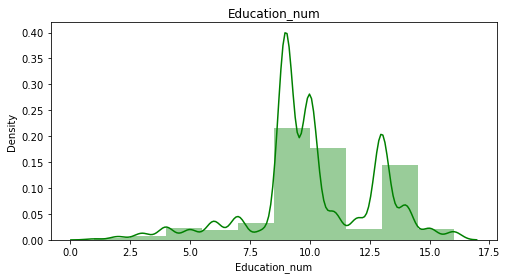

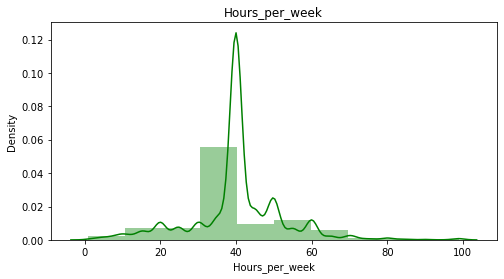

In [31]:
#Distribution plot for all numerical columns
for i in df[numerical_columns]:              
    plt.figure(figsize = (8, 4))
    sns.distplot(df[i], bins = 10, color="g")
    plt.title(i)
    plt.show()

By looking into the count plot of target i can say that there is a data imbalancing issue.And also i can say that People with saalary >50k per year are very less.Most of the people are getting income below 50k per year.

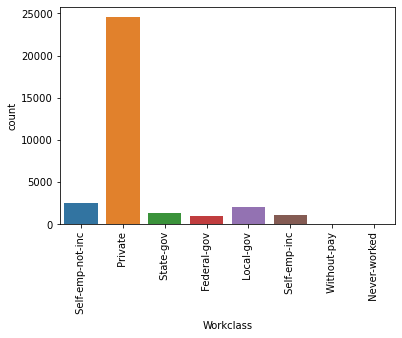

In [32]:
#Count plot for Workclass
sns.countplot(df['Workclass'])
plt.xticks(rotation=90);

So maximum people has choosen Private sector for working.And very few people choosed work Without-pay and Never-worked.

<AxesSubplot:xlabel='Education_num', ylabel='count'>

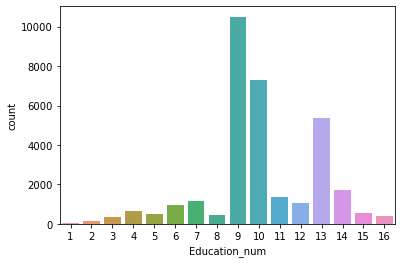

In [33]:
#Count plot for Education_num
sns.countplot(df['Education_num'])

Maximum workers belong to Education number 9,10,13 and very less people belong to 1,2,3.

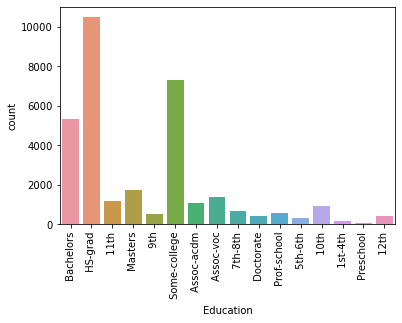

In [34]:
#Count plot for Education
sns.countplot(df['Education'])
plt.xticks(rotation=90);

Above plot says that HS-grad, Bachelors and Some-college has maximum count, which means most of the working people with these 3 types of education has more chance to get job.

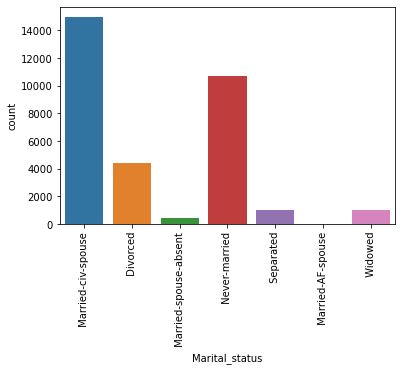

In [35]:
#Count plot for Marital_status
sns.countplot(df['Marital_status'])
plt.xticks(rotation=90);

People who are Married-civ-spouse, Never-married are more in number and Married-AF-spouse is too less in number.

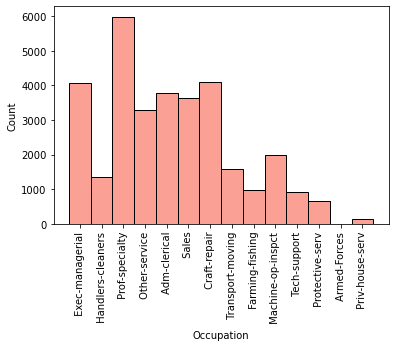

In [36]:
#Hist plot for Occupation
sns.histplot(df['Occupation'],color='salmon')
plt.xticks(rotation=90);

Most of the people has choosen Prof-specialty,Exec-managerial, Craft-repair as there Occupation except this Priv-house-serv and Armed-Forces are very less in count.

In [37]:

#Checking the value count of Relationship column
df["Relationship"].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

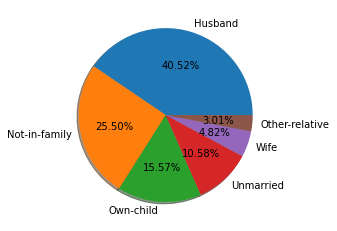

In [38]:
#Ploting pie chart for Relationship
labels='Husband','Not-in-family','Own-child','Unmarried','Wife','Other-relative'
fig, ax = plt.subplots()
ax.pie(df['Relationship'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

By looking into the pie chart most of the count is with Husband, Not-in-family and own-child.

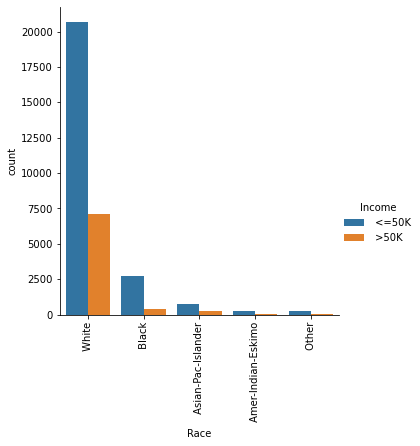

In [39]:
#Factor plot for Race
sns.factorplot('Race',kind='count',data=df,hue='Income')
plt.xticks(rotation=90);

In US white people have more chance of getting job than any other raced people.

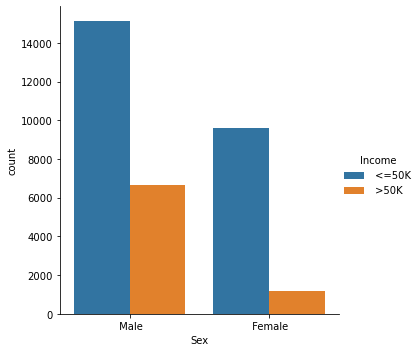

In [40]:
#Factor plot for Sex
sns.factorplot('Sex',kind='count',data=df,hue='Income')
plt.xticks(rotation=0);

Irrespective of income males have high count of getting job than women.And men also has high count of getting income >50k per year.

In [41]:
#Checking the value count of Sex column
df["Sex"].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

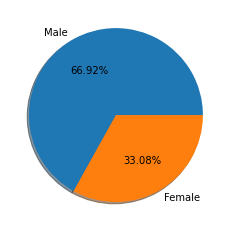

In [42]:
#Ploting pie chart for Sex
labels='Male','Female'
fig, ax = plt.subplots()
ax.pie(df['Sex'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

Most of the working people about 67% are male and women workers are less in number.

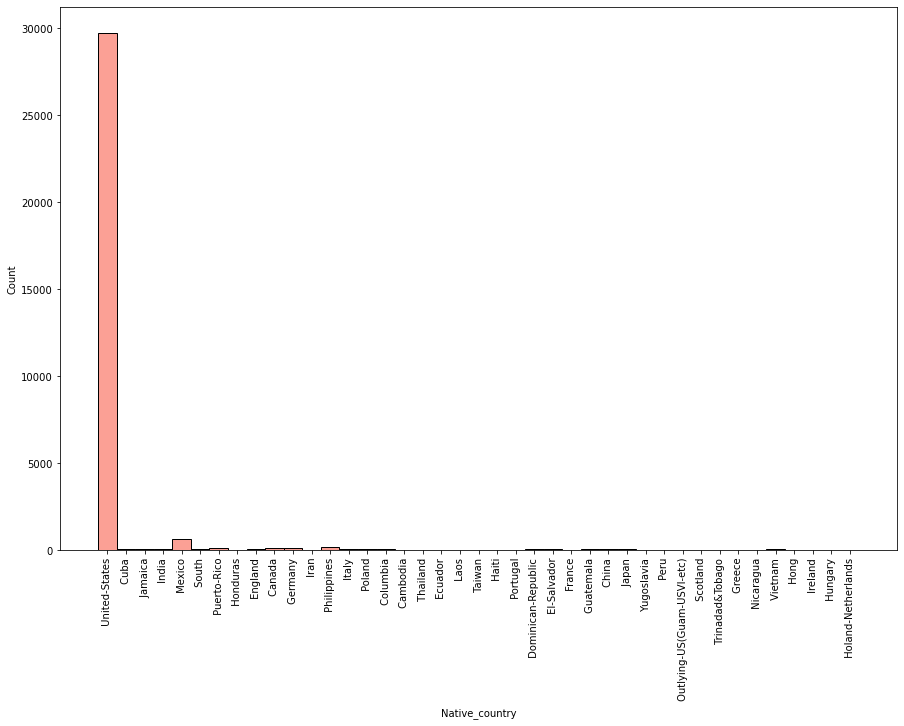

In [43]:
#Hist plot for Native_country
plt.figure(figsize=[15,10])
sns.histplot(df['Native_country'],color='salmon')
plt.xticks(rotation=90);

So most of the people in US gets job rather than all other states.

## Bivariate Analysis:

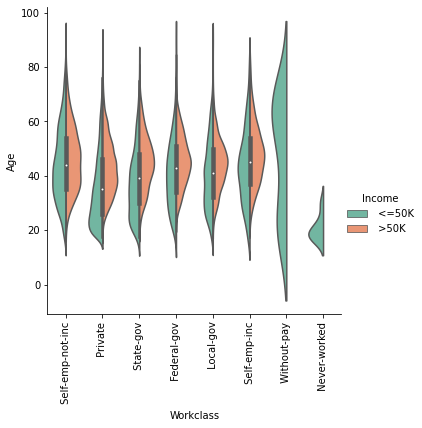

In [44]:
# Let's plot catplot for Workclass and Age
sns.catplot(x = "Workclass", y = "Age", hue = "Income", kind = "violin", data=df, split=True,palette='Set2')
plt.xticks(rotation=90);

All the Workclass has chances of getting income >50k except Without-pay and Never-worked.Which means if a person is working then there is a chance that he gets income of >50k.But if he is not at all working then obviously he'll not get that income.

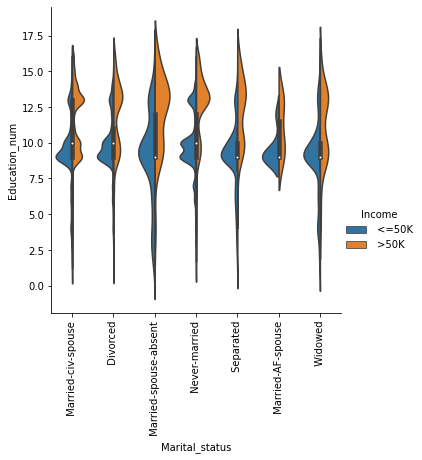

In [45]:
# Let's plot catplot for Marital_status and Education_num
sns.catplot(x = "Marital_status", y = "Education_num", hue = "Income", kind = "violin", data=df, split=True)
plt.xticks(rotation=90);

If the education number is high then obviously Income is high, but for married-spouse-absent is showing high education_num.

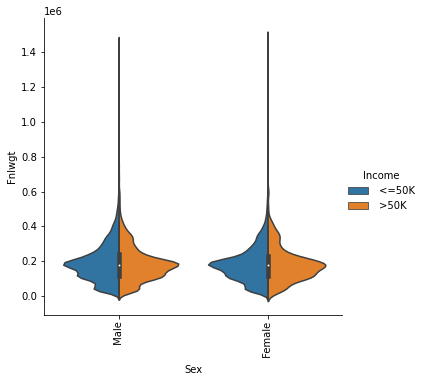

In [46]:
# Let's plot catplot for Sex and Fnlwgt
sns.catplot(x = "Sex", y = "Fnlwgt", hue = "Income", kind = "violin", data=df, split=True)
plt.xticks(rotation=90);

Both for male and female the Fnlwgt is same and they have same income also.

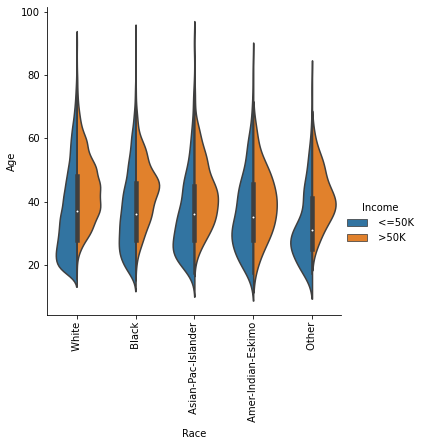

In [47]:
# Let's plot catplot for Race and Age
sns.catplot(x = "Race", y = "Age", hue = "Income", kind = "violin", data=df, split=True)
plt.xticks(rotation=90);

Chances of getting income >50k is more in case of Whites.That means in US white peoples are dominating.

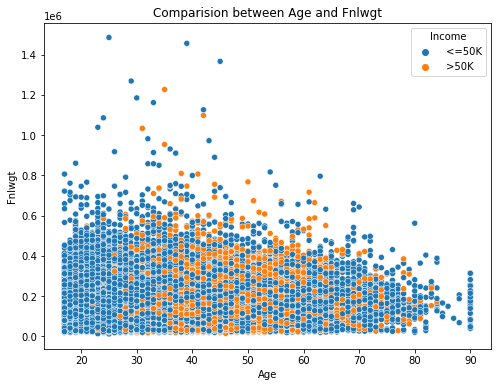

In [49]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Age and Fnlwgt')
sns.scatterplot(df['Age'],df['Fnlwgt'],hue=df["Income"]);

As the age of the worker increses there is less chance to get more income,And also as the Fnlgwt increases then the chance to get income is decreaseing.

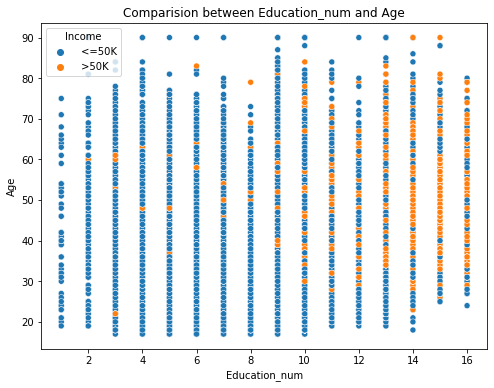

In [50]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Education_num and Age')
sns.scatterplot(df['Education_num'],df['Age'],hue=df["Income"]);


People with age above 70 has less chance of getting work and As the education number increases then the chance of getting income>50k is also high.

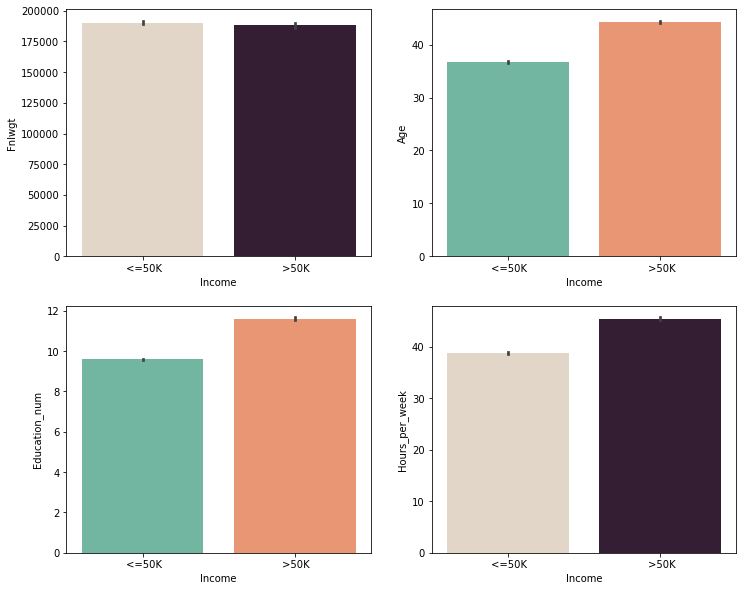

In [51]:
fig,axes=plt.subplots(2,2,figsize=(12,10))

# Checking income with Fnlwgt
sns.barplot(x='Income',y='Fnlwgt',ax=axes[0,0],data=df,palette='ch:.25')

# Checking income with Capital_gain
sns.barplot(x='Income',y='Age',ax=axes[0,1],data=df,palette='Set2')

# Checking income with Capital_loss
sns.barplot(x='Income',y='Education_num',ax=axes[1,0],data=df,palette='Set2')

# Checking income with Hours_per_week
sns.barplot(x='Income',y='Hours_per_week',ax=axes[1,1],data=df,palette='ch:.25')
plt.show()

With Fnlwgt the chance of getting income >50k and <=50k both are almost equal.

With Age the chance of getting >50k is high compared to chance of getting income <=50k.

With Education_num the chance of getting income >50k is very high than <=50k.

With hours_per_week also the chance of getting income >50k is high.

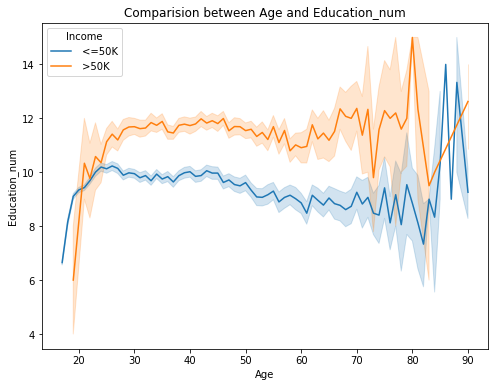

In [52]:
#Comparision between features using line plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Age and Education_num')
sns.lineplot(df['Age'],df['Education_num'],hue=df["Income"]);

It looks very clear that as the education number is increasing chance of getting income >5ok is also increasing.And also as age is more means experience is more the chance of getting income more than 50k is also more.

## Multivariate Analysis:

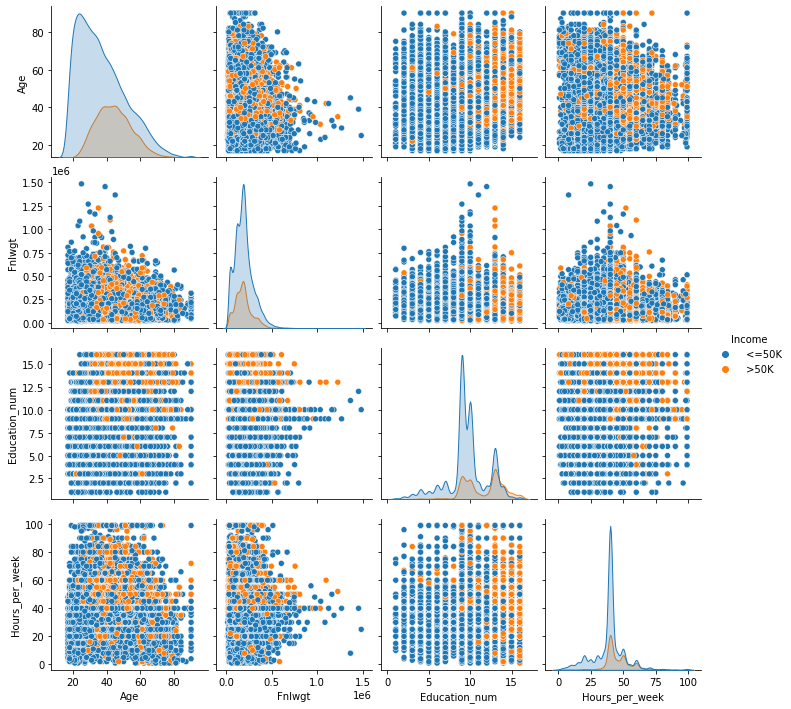

In [53]:
#pair ploting for df
sns.pairplot(df,hue="Income")

Above are the pair plots of df.And i can say that there are some extreme outliers in the dataset.And i have some skewness also.

## Checking for outliers:

<AxesSubplot:>

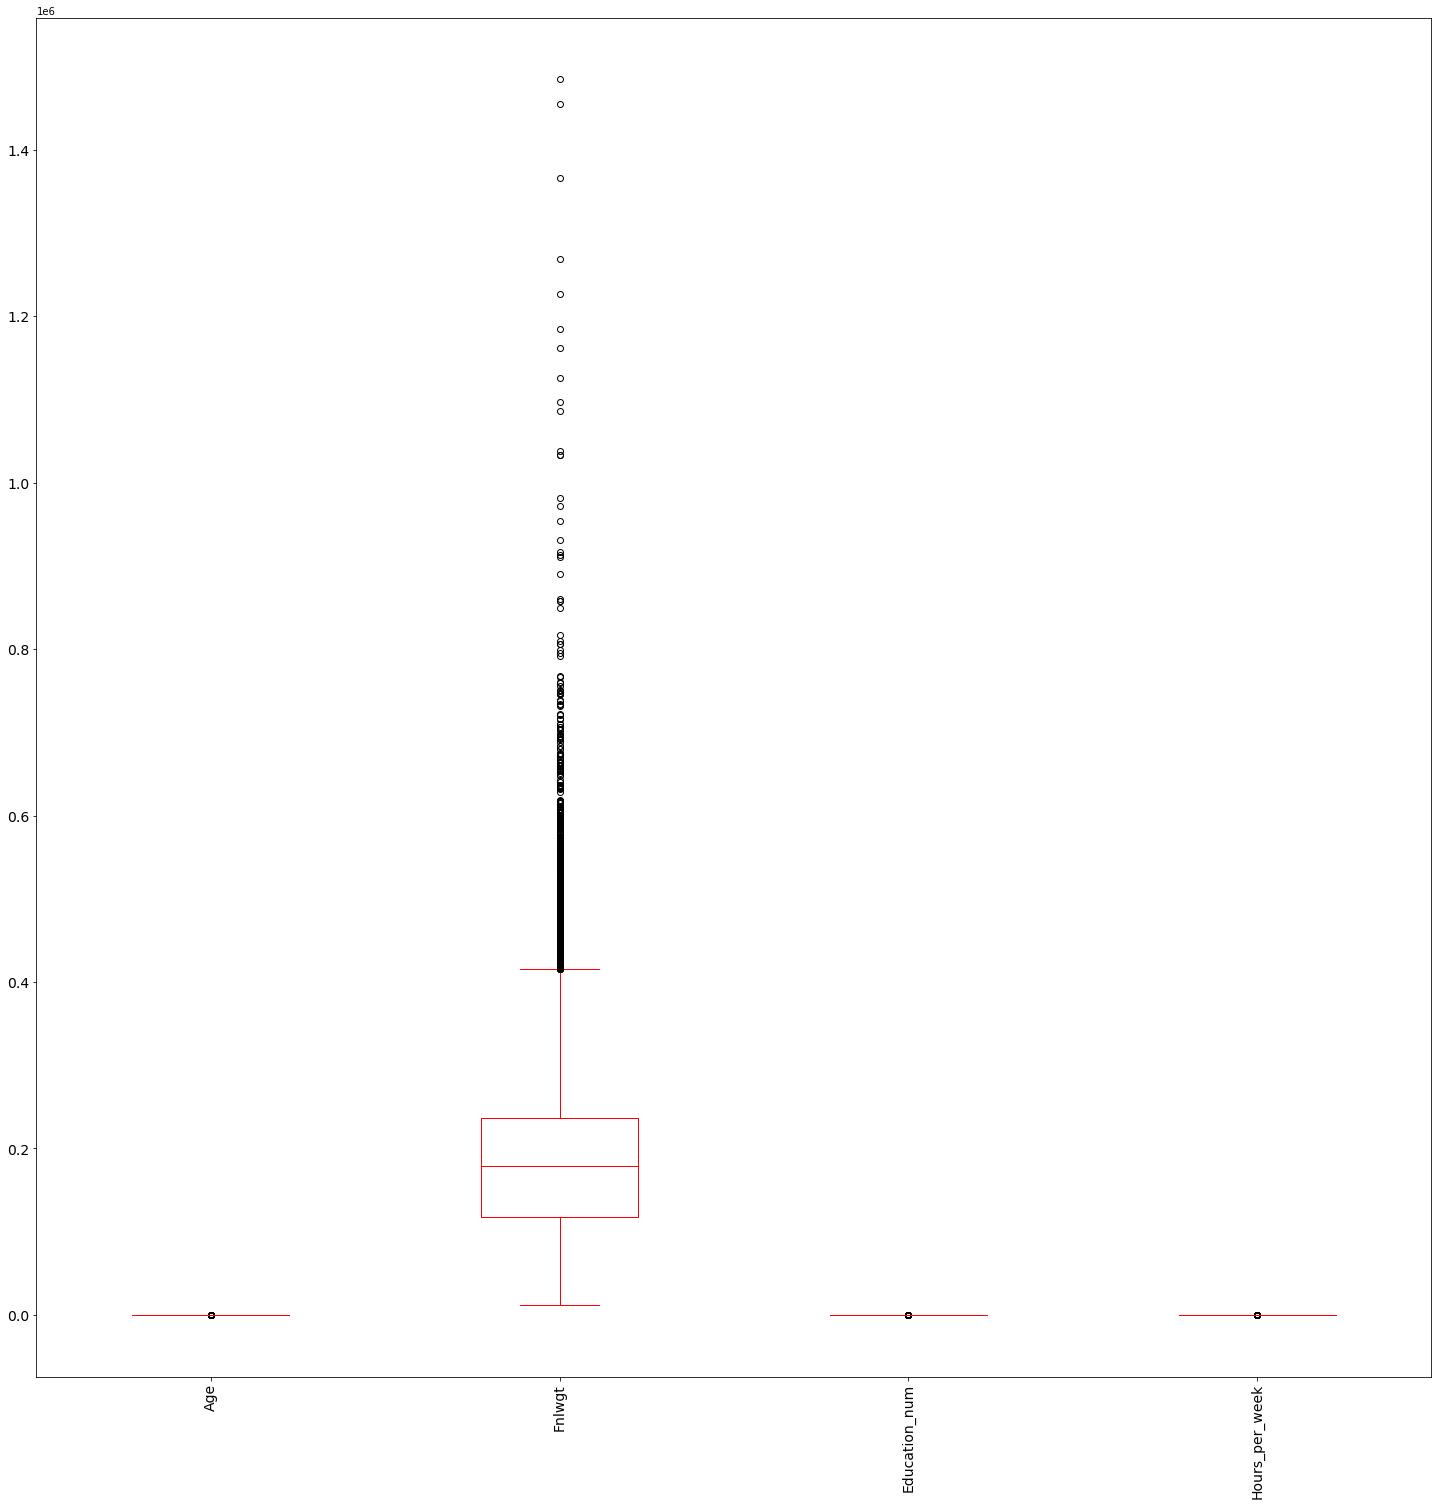

In [54]:
#Checking for outliers using boxplot
df.plot(rot = 90,kind='box',fontsize=14,figsize=(25,25),color='r')

There are outliers in all the numerical columns.I have to remove them.

## Removing outliers:

In [55]:
#Taking all the column names with outliers as a list
dfoutliers=df[["Age","Fnlwgt","Education_num","Hours_per_week"]]

Above are the list of columns with outliers.

## i) Zscore method:

In [56]:
from scipy.stats import zscore
z=np.abs(zscore(dfoutliers))
df_new=df[(z<3).all(axis=1)]
df_new.head(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K


I have removed the outliers using zscore method.

In [57]:
#Checking shape of new dataset
df_new.shape

(31461, 13)

In my new dataset i have 31461 rows and 13 columns.

In [58]:
#Checking shape of old dataset
df.shape

(32560, 13)

In my old dataset i was having 32560 rows and 13 columns.

In [59]:
#Checking dataloss in zscore method
Dataloss=(((32560-31461)/32560)*100)
Dataloss

3.3753071253071254

In zscore method the dataloss is 3.38% which is less than 10%.But let me have look into IQR method also.

## ii) IQR (Inter Quantile Range) method:

In [60]:
# 1st quantile
Q1=dfoutliers.quantile(0.25)

# 3rd quantile
Q3=dfoutliers.quantile(0.75)

# IQR
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

Using IQR i have removed the outliers.

In [61]:
#Checking shape of new dataset
df_1.shape

(21950, 13)

In my new dataset i am having 21950 rows and 13 columns.

In [62]:
#Checking shape of old dataset
df.shape

(32560, 13)

In my old dataset i was having 32560 rows and 13 columns.

In [63]:
#Checking dataloss in IQR method
Dataloss=(((32560-21950)/32560)*100)
Dataloss

32.58599508599509

There is a great dataloss in IQR method so let me stick on to zscore method to remove outliers.

## Checking for skewness:

In [64]:
#Checking for skewness
df_new.skew()

Age               0.472279
Fnlwgt            0.634828
Education_num    -0.159752
Hours_per_week   -0.341724
dtype: float64

There is skewness in Fnlwgt column.

## Removing skewness using yeo-johnson method:

In [65]:
fea=["Fnlwgt"]

Taking a list as fea with all the columns with skewness.

In [66]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

Using yeo_johnson method i have removing the skewness.

In [67]:
df_new[fea] = scaler.fit_transform(df_new[fea].values)

Got removed from skewness.

In [68]:
#Checking skewness again
df_new[fea].skew()

Fnlwgt   -0.034507
dtype: float64

Now the skewness is removed.

<AxesSubplot:ylabel='Density'>

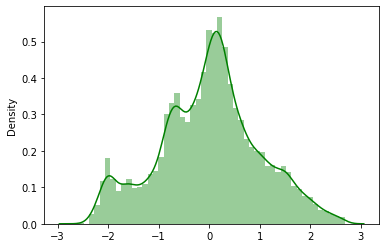

In [69]:
#Checking distplot for skewed columns after removing skewness
sns.distplot(df_new[fea],color='g')


It looks like skewness is removed completely.

## Label Encoding:

In [70]:
# Separating categorical columns in df_new
cat_col=[]
for i in df_new.dtypes.index:
    if df_new.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


Above are the list of categorical columns in new dataset.

In [72]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_new[cat_col]= df_new[cat_col].apply(LE.fit_transform)

In [73]:
df_new[cat_col].head()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,5,8,2,3,0,4,1,38,0
1,3,10,0,5,1,4,1,38,0
2,3,1,2,5,0,2,1,38,0
3,3,8,2,9,5,2,0,4,0
4,3,11,2,3,5,4,0,38,0


Using label encoder i have encoded the categorical columns.

In [74]:
df_new.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,5,-1.114171,8,13,2,3,0,4,1,13,38,0
1,38,3,0.427192,10,9,0,5,1,4,1,40,38,0
2,53,3,0.607320,1,7,2,5,0,2,1,40,38,0
3,28,3,1.487719,8,13,2,9,5,2,0,40,4,0
4,37,3,1.048962,11,14,2,3,5,4,0,40,38,0


Above is my new data set after encoding.

## Checking correlation using heat map:

In [75]:

cor=df_new.corr()

Checking correlation.

In [76]:
cor

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,0.038024,-0.066519,-0.000447,0.053361,-0.286424,-0.001321,-0.268028,0.030679,0.091664,0.097510,-0.001039,0.248351
Workclass,0.038024,1.000000,-0.021654,0.004652,0.003831,-0.020597,0.007551,-0.056825,0.046295,0.070095,0.030311,-0.001602,0.003494
Fnlwgt,-0.066519,-0.021654,1.000000,-0.024191,-0.033150,0.027732,0.001992,0.008287,-0.008299,0.025290,-0.015566,-0.061214,-0.004586
Education,-0.000447,0.004652,-0.024191,1.000000,0.356040,-0.039094,-0.041224,-0.015121,0.015552,-0.024911,0.061325,0.068374,0.077526
Education_num,0.053361,0.003831,-0.033150,0.356040,1.000000,-0.065568,0.073927,-0.102497,0.030849,0.016662,0.160483,0.054510,0.337595
Marital_status,-0.286424,-0.020597,0.027732,-0.039094,-0.065568,1.000000,0.034640,0.185772,-0.067546,-0.127375,-0.197532,-0.017606,-0.198475
Occupation,-0.001321,0.007551,0.001992,-0.041224,0.073927,0.034640,1.000000,-0.037549,-0.004094,0.047864,-0.019943,-0.003666,0.034612
Relationship,-0.268028,-0.056825,0.008287,-0.015121,-0.102497,0.185772,-0.037549,1.000000,-0.115216,-0.582940,-0.263412,-0.010871,-0.251506
Race,0.030679,0.046295,-0.008299,0.015552,0.030849,-0.067546,-0.004094,-0.115216,1.000000,0.088642,0.045331,0.122051,0.072451
Sex,0.091664,0.070095,0.025290,-0.024911,0.016662,-0.127375,0.047864,-0.582940,0.088642,1.000000,0.239039,0.002060,0.216665


Above are the correlations of all the pair of features.To get better visualization on the correlation of features,let me plot it using heat map.

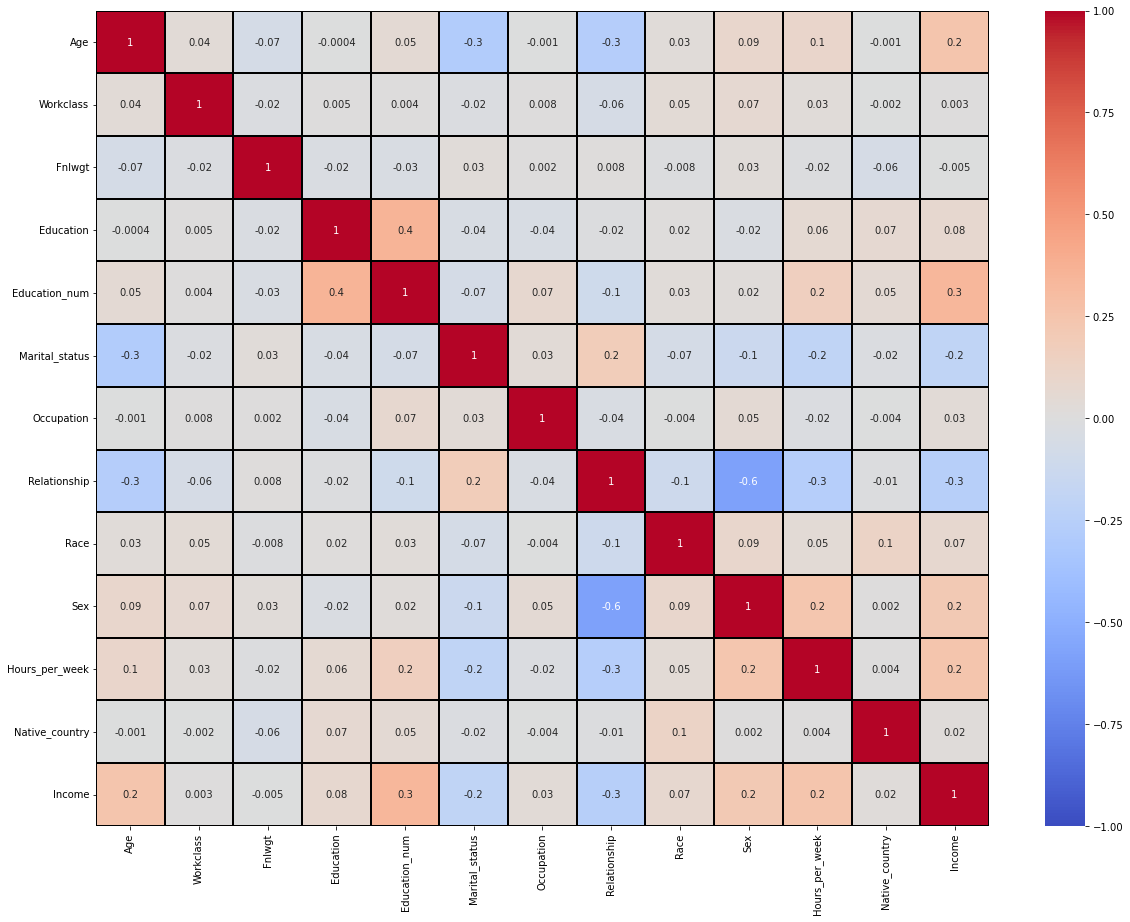

In [77]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(20,15))
sns.heatmap(df_new.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

By looking into the heat map i can say that there is no multicolinearity issue.

Workclass and Fnlwgt has very less correlation with target.

Native_country, Occupation, Race and Education has less correlation with target column.

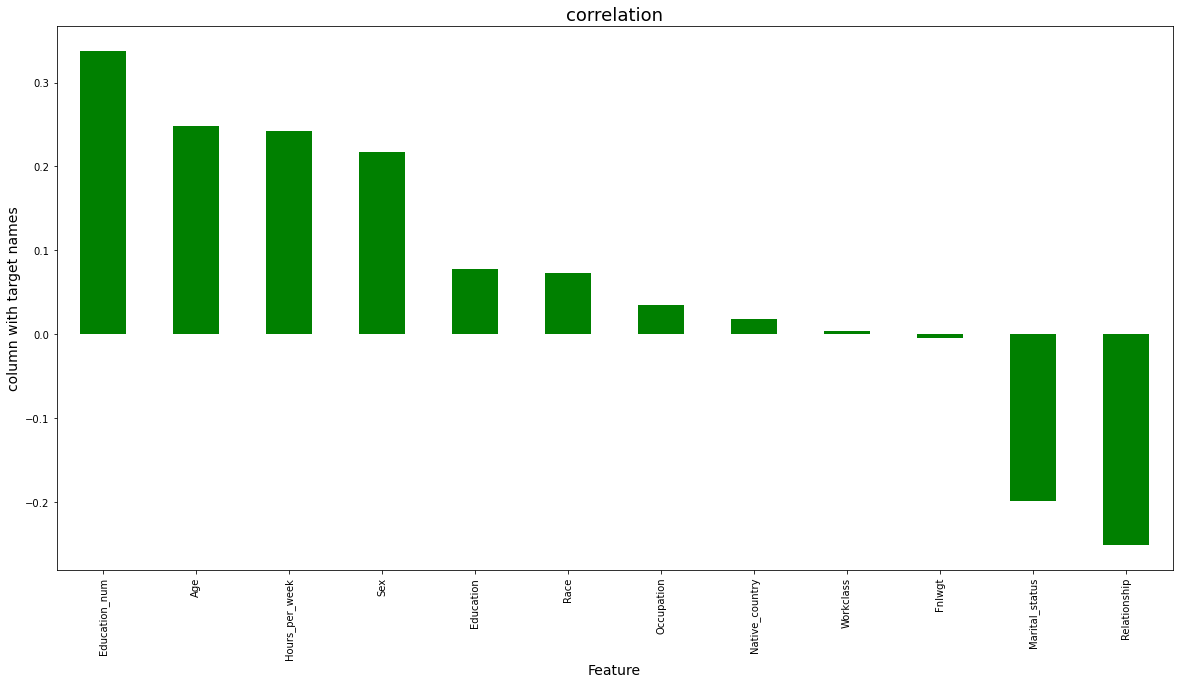

In [78]:
plt.figure(figsize=(20,10))
df_new.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Workclass and Fnlwgt is very less correlated with target column.

In [79]:
#Droping less correlated column
df_new = df_new.drop(["Workclass"],axis=1)

## Separating features and label:

In [80]:
x = df_new.drop("Income",axis=1)
y = df_new["Income"]

I have separated my target and independent columns.

## Scaling the data using standard scaler:

In [81]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

I have scaled my data using standard scaler.

In [82]:
X.head()

,Age,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.875057,-1.114171,-0.348344,1.154324,-0.403597,-0.784335,-0.903178,0.391304,0.706601,-2.424121,0.254062
1,-0.025350,0.427192,0.245782,-0.459657,-1.733114,-0.282327,-0.281938,0.391304,0.706601,-0.008364,0.254062
2,1.100158,0.607320,-2.427783,-1.266647,-0.403597,-0.282327,-0.903178,-1.969806,0.706601,-0.008364,0.254062
3,-0.775689,1.487719,-0.348344,1.154324,-0.403597,0.721690,2.203019,-1.969806,-1.415226,-0.008364,-5.457546
4,-0.100384,1.048962,0.542845,1.557819,-0.403597,-0.784335,2.203019,0.391304,-1.415226,-0.008364,0.254062


This is the data of independent variables after scaling.

## Finding Best Random State and Accuracy:

In [92]:
#importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [94]:
from sklearn.ensemble import RandomForestClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestClassifier()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.829642970653671  on Random_state  69


I got the best accuracy and random state.

In [96]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

Created train and test data.

## Classification Algorithms:

In [100]:
#importing necessary libraries.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

## i) DecisionTreeClassifier:

In [101]:

DTC=DecisionTreeClassifier()
DTC.fit(X_train,y_train)
preddt=DTC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, preddt))
print('Confusion Matrix:',confusion_matrix(y_test, preddt))
print(classification_report(y_test,preddt))

Accuracy Score: 0.7715859730903697
Confusion Matrix: [[6072 1132]
 [1024 1211]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      7204
           1       0.52      0.54      0.53      2235

    accuracy                           0.77      9439
   macro avg       0.69      0.69      0.69      9439
weighted avg       0.78      0.77      0.77      9439



DTC is giving me 77% accuracy.

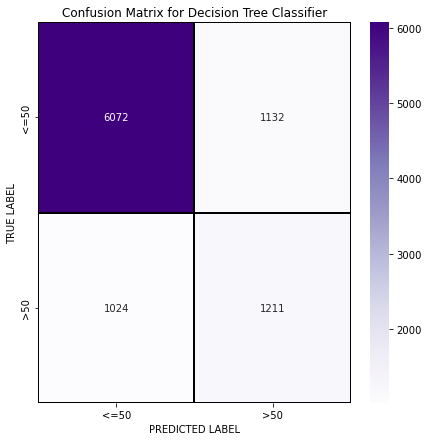

In [102]:
cm = confusion_matrix(y_test, preddt)

x_axis_labels = ["<=50",">50"]
y_axis_labels = ["<=50",">50"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()


We can see the true values and predicted values in Decision Tree Classifier model using confusion matrix.

## ii) RandomForestClassifier:

In [103]:
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)
predrf=RFC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predrf))
print('Confusion Matrix:',confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))

Accuracy Score: 0.8274181587032524
Confusion Matrix: [[6527  677]
 [ 952 1283]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      7204
           1       0.65      0.57      0.61      2235

    accuracy                           0.83      9439
   macro avg       0.76      0.74      0.75      9439
weighted avg       0.82      0.83      0.82      9439



RFC is giving me 82% accuracy.

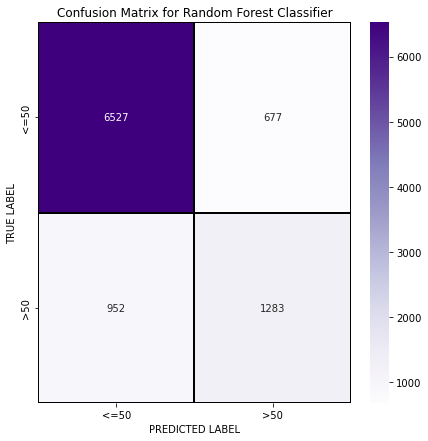

In [104]:
cm = confusion_matrix(y_test, predrf)

x_axis_labels = ["<=50",">50"]
y_axis_labels = ["<=50",">50"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

We can see the true values and predicted values in Random Forest Classifier model using confusion matrix.

## iii) SupportVectorClassifier:

In [105]:
SV=SVC()
SV.fit(X_train,y_train)
predsv=SV.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predsv))
print('Confusion Matrix:',confusion_matrix(y_test, predsv))
print(classification_report(y_test,predsv))

Accuracy Score: 0.8261468375887276
Confusion Matrix: [[6779  425]
 [1216 1019]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7204
           1       0.71      0.46      0.55      2235

    accuracy                           0.83      9439
   macro avg       0.78      0.70      0.72      9439
weighted avg       0.81      0.83      0.81      9439



SVC is giving me 82% accuracy.

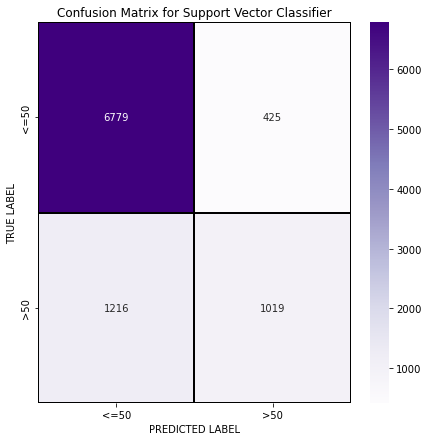

In [106]:
cm = confusion_matrix(y_test, predsv)

x_axis_labels = ["<=50",">50"]
y_axis_labels = ["<=50",">50"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Classifier')
plt.show()

We can see the true values and predicted values in Support vector Classifier model using confusion matrix.

## iv) K-Neighbor Classifier:

In [107]:
knn=KNN()
knn.fit(X_train,y_train)
predkn=knn.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predkn))
print('Confusion Matrix:',confusion_matrix(y_test, predkn))
print(classification_report(y_test,predkn))

Accuracy Score: 0.8174594766394745
Confusion Matrix: [[6464  740]
 [ 983 1252]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      7204
           1       0.63      0.56      0.59      2235

    accuracy                           0.82      9439
   macro avg       0.75      0.73      0.74      9439
weighted avg       0.81      0.82      0.81      9439



KNN is giving me 81% accuracy.

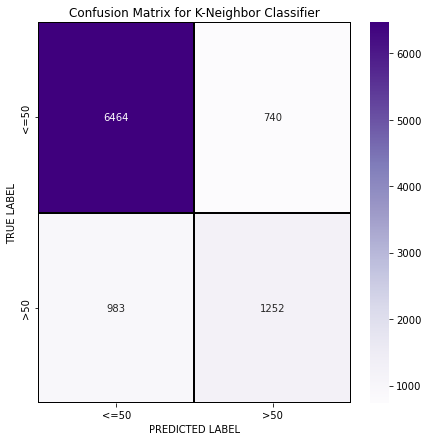

In [109]:
cm = confusion_matrix(y_test, predkn)

x_axis_labels = ["<=50",">50"]
y_axis_labels = ["<=50",">50"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for K-Neighbor Classifier')
plt.show()

We can see the true values and predicted values in KNN Classifier model using confusion matrix.

## v) Gradient Boosting Classifier:

In [110]:
GBC=GradientBoostingClassifier()
GBC.fit(X_train,y_train)
predgb=GBC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predgb))
print('Confusion Matrix:',confusion_matrix(y_test, predgb))
print(classification_report(y_test,predgb))


Accuracy Score: 0.8425680686513402
Confusion Matrix: [[6686  518]
 [ 968 1267]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      7204
           1       0.71      0.57      0.63      2235

    accuracy                           0.84      9439
   macro avg       0.79      0.75      0.77      9439
weighted avg       0.83      0.84      0.84      9439



GBC is giving me 84% accuracy.

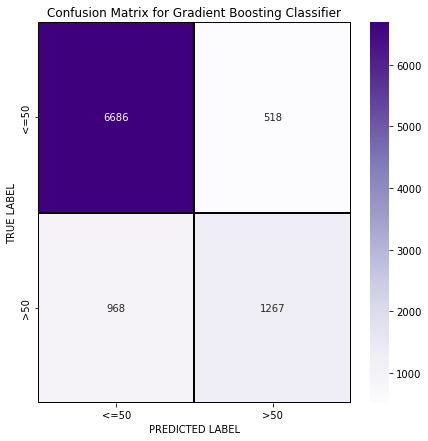

In [112]:
cm = confusion_matrix(y_test, predgb)

x_axis_labels = ["<=50",">50"]
y_axis_labels = ["<=50",">50"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()


We can see the true values and predicted values in GB Classifier model using confusion matrix.

## vi) Logistic Regression:

In [114]:

LR=LogisticRegression()
LR.fit(X_train,y_train)
predlr=LR.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predlr))
print('Confusion Matrix:',confusion_matrix(y_test, predlr))
print(classification_report(y_test,predlr))

Accuracy Score: 0.8106790973620087
Confusion Matrix: [[6737  467]
 [1320  915]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.88      7204
           1       0.66      0.41      0.51      2235

    accuracy                           0.81      9439
   macro avg       0.75      0.67      0.69      9439
weighted avg       0.79      0.81      0.79      9439




LR is giving me 81% accuracy.

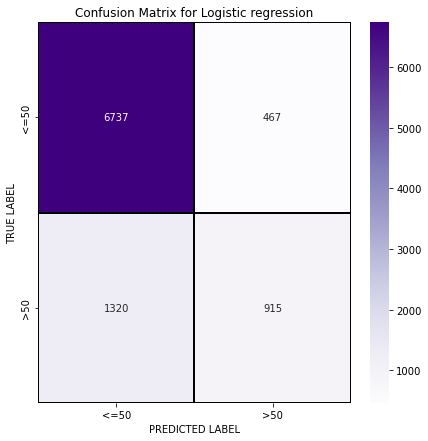

In [115]:
cm = confusion_matrix(y_test, predlr)

x_axis_labels = ["<=50",">50"]
y_axis_labels = ["<=50",">50"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic regression')
plt.show()

We can see the true values and predicted values in LR model using confusion matrix.

## Cross Validation Score:

In [116]:
#Importing library
from sklearn.model_selection import cross_val_score


In [117]:
# cv score for Logistic Regression 
print(cross_val_score(LR,X,y,cv=5).mean())

0.8051239083497148


In [118]:
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,X,y,cv=5).mean())

0.7735609571942872


In [119]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,X,y,cv=5).mean())

0.8215887308161551


In [120]:
# cv score for Support Vector Classifier
print(cross_val_score(SV,X,y,cv=5).mean())

0.8250534378150922


In [121]:
# cv score for KNN Classifier
print(cross_val_score(knn,X,y,cv=5).mean())

0.8097646766217906


By looking into the difference of model accuracy and cross validation score i found that RFC as best model.

In [123]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [124]:
parameter = {'criterion':['gini','entropy'],
             'max_depth': [10,15,20,25],
             'n_estimators':[100,200,300,400],
             'max_features': ["auto","sqrt","log2"]}

Giving the parameters list for RFC model.

In [ ]:

GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

Training the model with GCV.

In [131]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'log2',
 'n_estimators': 200}

Got the best parameters for RFC.

In [132]:
Final_mod=RandomForestClassifier(criterion='gini',max_depth=25, max_features='auto', n_estimators=200)
Final_mod.fit(X_train,y_train)
pred=Final_mod.predict(X_test)
acc=accuracy_score(y_test, pred)

print(acc*100)

83.27153300137726


I got best model as RFC and i got the accuracy 83.27% after tunning which is good.

## ROC-AUC curve:

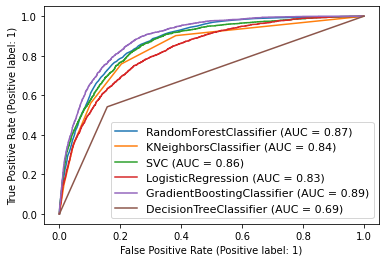

In [134]:
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 
disp = plot_roc_curve(RFC,X_test,y_test)
plot_roc_curve(knn, X_test, y_test, ax=disp.ax_)     # ax_=Axes with confusion matrix
plot_roc_curve(SV, X_test, y_test, ax=disp.ax_)
plot_roc_curve(LR, X_test, y_test, ax=disp.ax_)
plot_roc_curve(GBC, X_test, y_test, ax=disp.ax_)
plot_roc_curve(DTC, X_test, y_test, ax=disp.ax_)


plt.legend(prop={'size':11}, loc='lower right')
plt.show()

Above is the ROC curves for all the models that i have predicted.And the AUC values can also be seen in the plot.

## Saving the model:

In [135]:
#Saving the model as .pkl file
import joblib
joblib.dump(Final_mod,"Censusincome.pkl")

['Censusincome.pkl']

I have saved the model as Censusincome.

## Predictions:

# Loading the saved model
model=joblib.load("Censusincome.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

In [138]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])

0     1     2     3     4     5     6     7     8     9     10    \
Predicted     0     0     1     0     0     0     0     1     0     0     0   
Actual        1     0     1     0     0     0     0     1     0     0     0   

           11    12    13    14    15    16    17    18    19    20    21    \
Predicted     1     0     0     1     0     0     0     0     0     0     0   
Actual        1     0     0     0     0     0     0     0     0     0     0   

           22    23    24    25    26    27    28    29    30    31    32    \
Predicted     0     0     0     0     0     0     0     0     1     1     0   
Actual        0     0     0     0     0     1     0     0     1     1     0   

           33    34    35    36    37    38    39    40    41    42    43    \
Predicted     0     0     1     0     0     0     0     0     0     0     0   
Actual        1     0     1     1     0     0     0     0     0     0     1   

           44    45    46    47    48    49    50    51    52    53    54    \
Predicted     0     0     0     0     0     0     1     0     0     0     0   
Actual        0     0     0     0     0     0     1     0     0     0     0   

           55    56    57    58    59    60    61    62    63    64    65    \
Predicted     0     0     1     1     0     0     0     0     1     0     0   
Actual        0     0     1     0     0     0     0     0     0     0     1   

           66    67    68    69    70    71    72    73    74    75    76    \
Predicted     0     1     0     0     0     0     0     0     0     0     1   
Actual        0     0     0     0     0     0     0     0     0     1     1   

           77    78    79    80    81    82    83    84    85    86    87    \
Predicted     1     0     1     0     0     1     0     0     1     0     0   
Actual        1     0     0     1     0     1     0     0     1     0     1   

           88    89    90    91    92    93    94    95    96    97    98    \
Predicted     0     1     1     0     0     0     0     0     0     0     1   
Actual        0     1     1     0     1     1     1     0     0     0     1   

           99    100   101   102   103   104   105   106   107   108   109   \
Predicted     0     1     0     1     0     1     0     1     0     0     0   
Actual        0     1     0     1     0     0     0     1     0     0     0   

           110   111   112   113   114   115   116   117   118   119   120   \
Predicted     0     0     0     0     0     0     1     0     0     0     0   
Actual        0     0     1     0     0     0     1     0     0     0     0   

           121   122   123   124   125   126   127   128   129   130   131   \
Predicted     1     0     0     0     0     0     0     1     0     1     0   
Actual        1     0     0     0     0     0     0     0     1     0     0   

           132   133   134   135   136   137   138   139   140   141   142   \
Predicted     1     0     0     0     0     0     0     0     1     0     0   
Actual        1     0     0     0     1     0     0     0     0     0     0   

           143   144   145   146   147   148   149   150   151   152   153   \
Predicted     0     0     0     0     0     1     0     0     1     0     1   
Actual        0     0     0     0     1     0     0     0     1     0     0   

           154   155   156   157   158   159   160   161   162   163   164   \
Predicted     0     0     0     0     0     0     0     0     0     0     1   
Actual        1     0     0     0     0     0     0     0     0     0     0   

           165   166   167   168   169   170   171   172   173   174   175   \
Predicted     0     1     0     0     0     0     1     0     0     0     1   
Actual        0     1     0     0     0     0     0     0     0     0     0   

           176   177   178   179   180   181   182   183   184   185   186   \
Predicted     0     0     0     0     0     0     1     0     0     0     1   
Actual        0     0     0     0     0     0

Above are the predicted values and the actual values.They are almost similar.

# THANK YOU:)

In [ ]:
------------------------------------------------------------------------------------------------------------